In [1]:
## Callin Switzer
## Capture Images from pt grey camera

In [2]:
# setup arduino
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

import datetime

import PyCapture2 as fc2
import sys

import time

import os
import peakutils 
import msvcrt
import winsound
import shutil
import pandas as pd

import skimage.io as io

In [3]:
print("last update: "  +  str(datetime.datetime.now()))

last update: 2017-11-14 10:16:37.400618


In [4]:
# capture image with point grey camera
bus = fc2.BusManager()
numCams = bus.getNumOfCameras()
print("Number of cameras detected: ", numCams)
if not numCams:
    print("Insufficient number of cameras. Exiting...")
    exit()

Number of cameras detected:  2


In [5]:
def enableEmbeddedTimeStamp(cam, enableTimeStamp):
    embeddedInfo = cam.getEmbeddedImageInfo()
    if embeddedInfo.available.timestamp:
        cam.setEmbeddedImageInfo(timestamp = enableTimeStamp)
        if(enableTimeStamp):
            print("\nTimeStamp is enabled.\n")
        else:
            print("\nTimeStamp is disabled.\n")

In [6]:
# open qtconsole if it's not already running
try:
    console_is_running
except NameError:
    console_is_running = True
    %qtconsole

In [52]:
def printCameraInfo(cam):
    camInfo = cam.getCameraInfo()
    print("\n*** CAMERA INFORMATION ***\n")
    print("Serial number - ", camInfo.serialNumber)
    print("Camera model - ", camInfo.modelName)
    print("Camera vendor - ", camInfo.vendorName)
    print("Sensor - ", camInfo.sensorInfo)
    print("Resolution - ", camInfo.sensorResolution)
    print("Firmware version - ", camInfo.firmwareVersion)
    print("Firmware build time - ", camInfo.firmwareBuildTime)
    fRateProp = c.getProperty(fc2.PROPERTY_TYPE.FRAME_RATE)
    print("FrameRate - ", fRateProp.absValue)
    print()

In [53]:
c = fc2.Camera()
c.connect(bus.getCameraFromIndex(0))
printCameraInfo(c)

d = fc2.Camera()
d.connect(bus.getCameraFromIndex(1))
printCameraInfo(d)


*** CAMERA INFORMATION ***

Serial number -  16061221
Camera model -  b'Chameleon3 CM3-U3-13Y3C'
Camera vendor -  b'Point Grey Research'
Sensor -  b'OnSemi PYTHON1300 (1/2" Color CMOS)'
Resolution -  b'1280x1024'
Firmware version -  b'1.9.3.0'
Firmware build time -  b'Mon Jul 27 20:45:52 2015'
FrameRate -  92.39653778076172


*** CAMERA INFORMATION ***

Serial number -  16060682
Camera model -  b'Chameleon3 CM3-U3-13Y3C'
Camera vendor -  b'Point Grey Research'
Sensor -  b'OnSemi PYTHON1300 (1/2" Color CMOS)'
Resolution -  b'1280x1024'
Firmware version -  b'1.9.3.0'
Firmware build time -  b'Mon Jul 27 20:45:52 2015'
FrameRate -  92.39653778076172



In [38]:
def img2array(image):
    return(np.array(image.getData(), dtype="uint8").reshape( (image.getRows(), image.getCols()) ))

In [46]:
# save multiple images

directory = os.path.join("C:\\Users\\Combes4\Desktop\\twoCamSave")

def twoCamSave():
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    ctr = 1
    prevts1 = None
    
    while(True):
        # Capture frame-by-frame
        try:
            image = c.retrieveBuffer()
            image2 = d.retrieveBuffer() 
            ts1 = image.getTimeStamp()
            ts2 = image2.getTimeStamp()
        except fc2.Fc2error as fc2Err:
            print("Error retrieving buffer : ", fc2Err)
            continue
        image = c.retrieveBuffer()
        image2 = d.retrieveBuffer()

#         if (prevts1):
#             diff1 = (ts1.cycleSeconds - prevts1.cycleSeconds) * 8000 + (ts1.cycleCount - prevts1.cycleCount)
#             diff2 = (ts2.cycleSeconds - prevts2.cycleSeconds) * 8000 + (ts2.cycleCount - prevts2.cycleCount)
#             print("timestamp [", ts1.cycleSeconds, ts1.cycleCount, "] -", diff1, "_____" "timestamp [", ts2.cycleSeconds, ts2.cycleCount, "] -", diff2)
#         prevts1 = ts1
#         prevts2= ts2

        # save images
        image.save(os.path.join(directory, ("c1_" + str(ctr).zfill(4)+ ".png")).encode('utf-8'), fc2.IMAGE_FILE_FORMAT.PNG)
        image2.save(os.path.join(directory, ("c2_" + str(ctr).zfill(4)+ ".png")).encode('utf-8'), fc2.IMAGE_FILE_FORMAT.PNG)
        
        if ctr > 10:
            break
            
        ctr += 1
        
#         # break when "q" is pressed on keyboard
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             for jj in range(10):
#                 cv2.destroyAllWindows()
#             break



In [47]:
c = fc2.Camera()
c.connect(bus.getCameraFromIndex(0))
enableEmbeddedTimeStamp(c, True)
c.startCapture()


d = fc2.Camera()
d.connect(bus.getCameraFromIndex(1))
enableEmbeddedTimeStamp(c, True)
d.startCapture()



TimeStamp is enabled.


TimeStamp is enabled.



In [48]:
twoCamSave()

In [49]:
# When everything done, release the capture
c.stopCapture()
c.disconnect()

d.stopCapture()
d.disconnect()
cv2.destroyAllWindows()

In [50]:
c1 = [os.path.join(directory, jj) for jj in os.listdir(directory) if jj.startswith("c1")]
c2 = [os.path.join(directory, jj) for jj in os.listdir(directory) if jj.startswith("c2")]

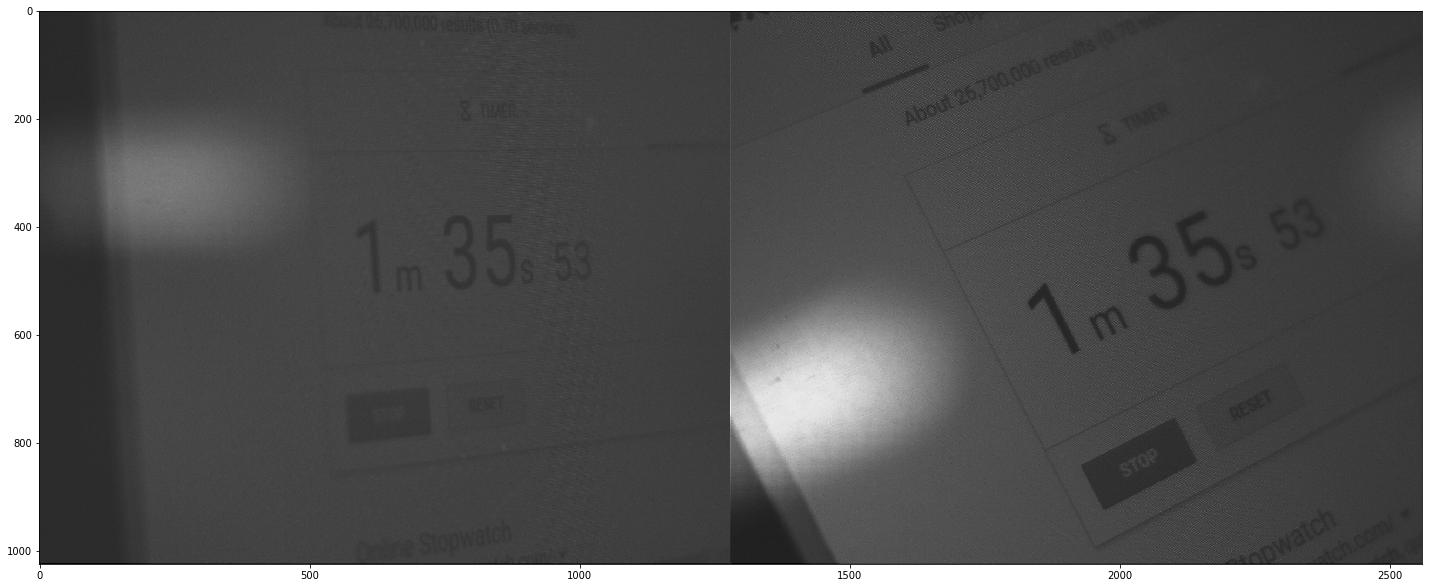

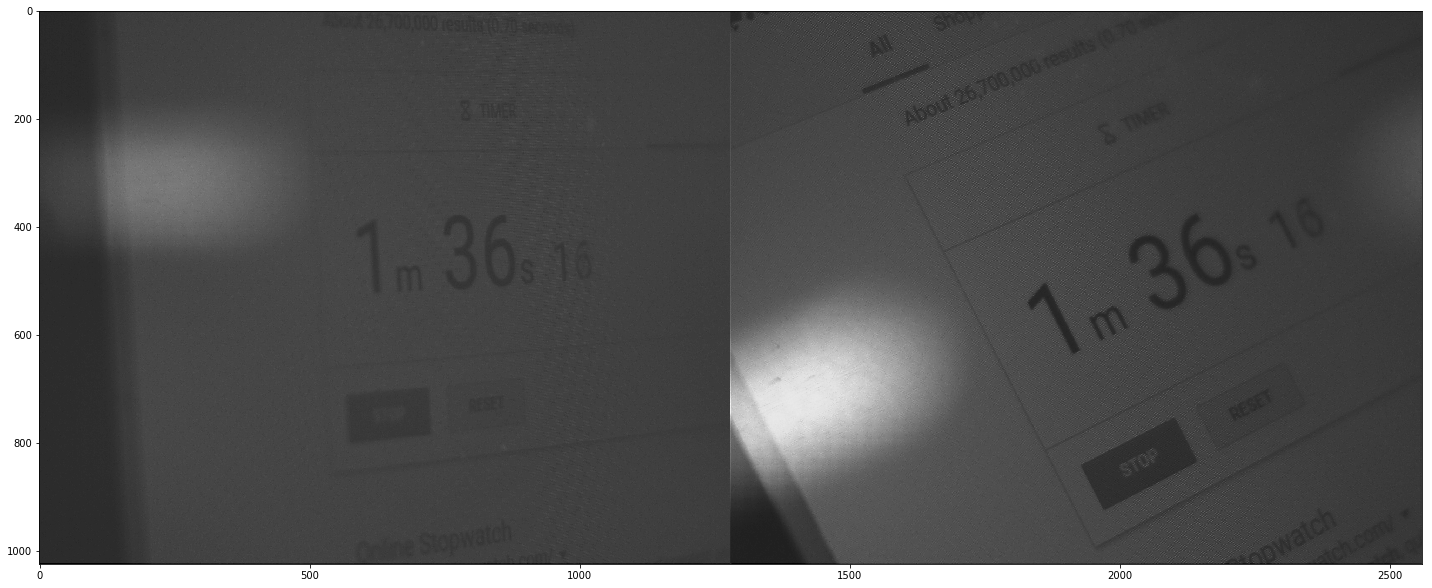

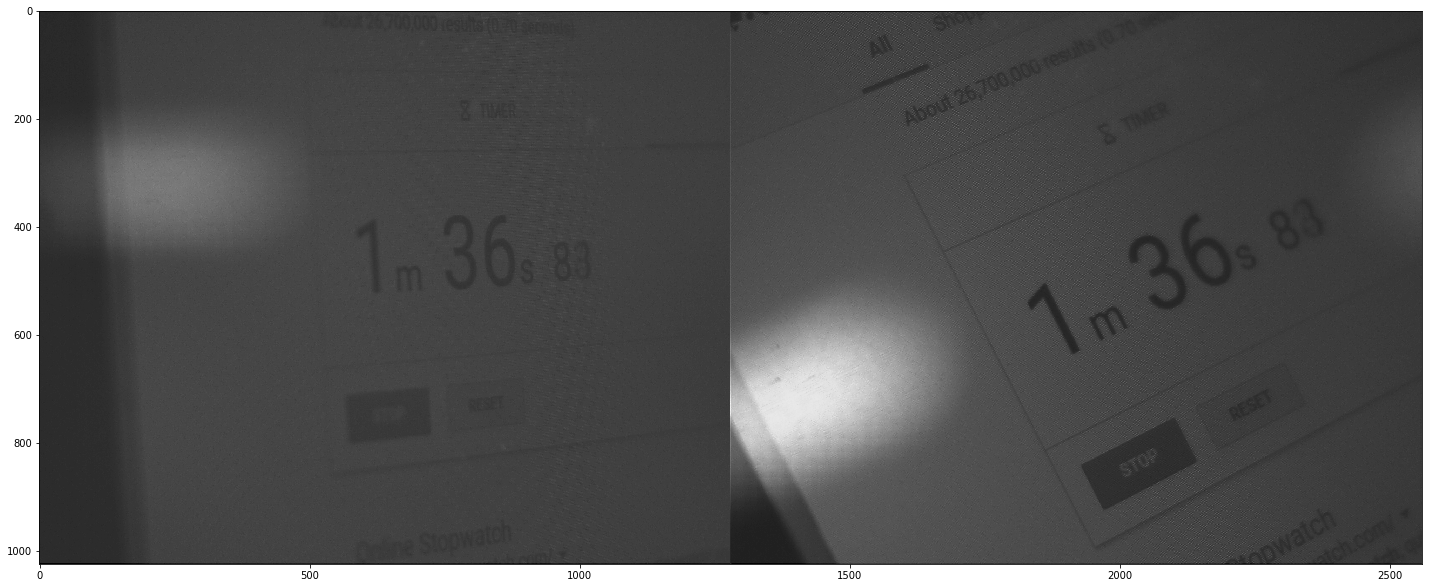

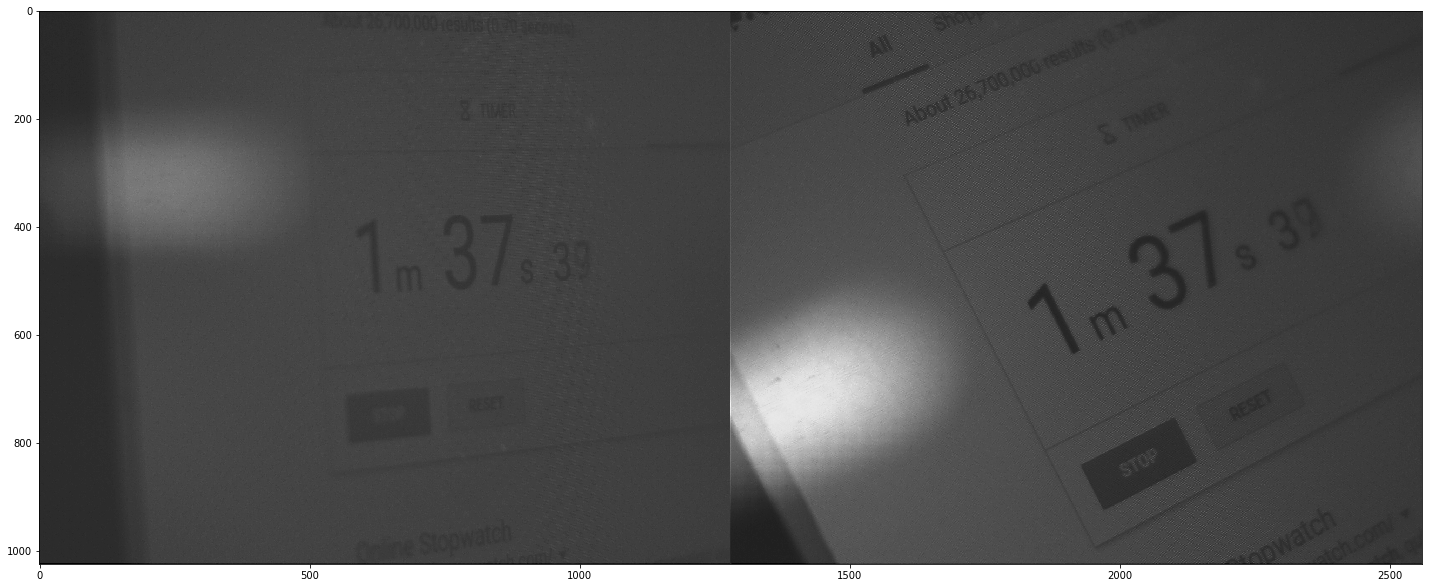

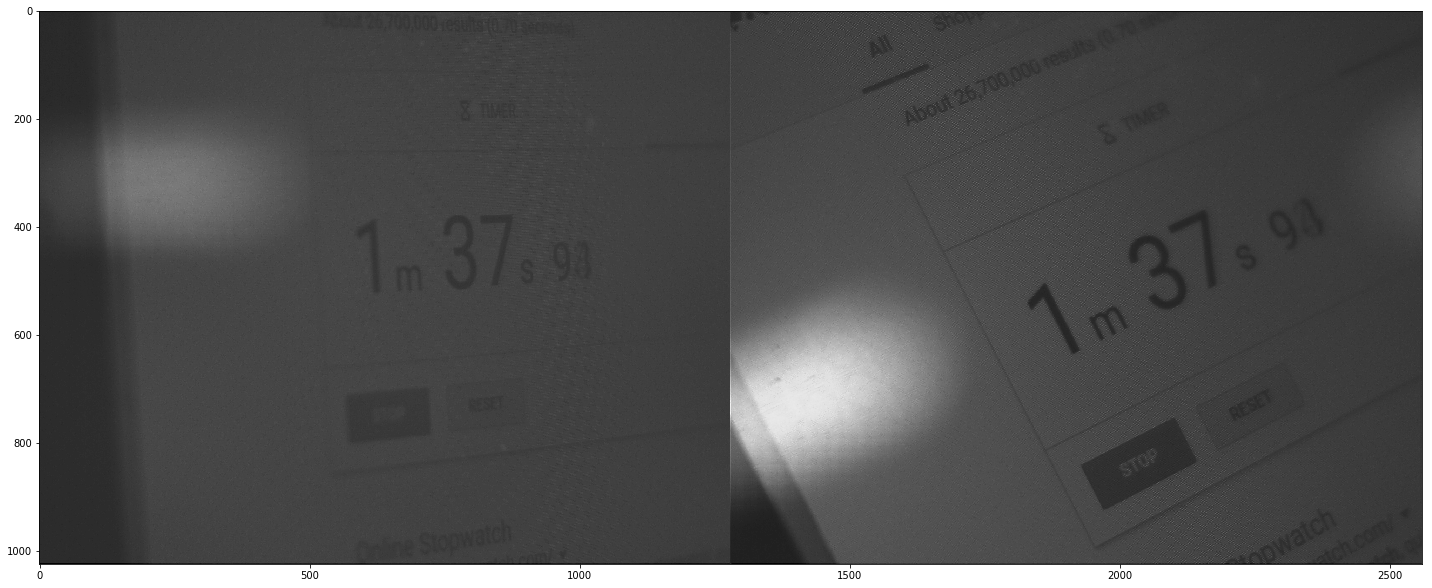

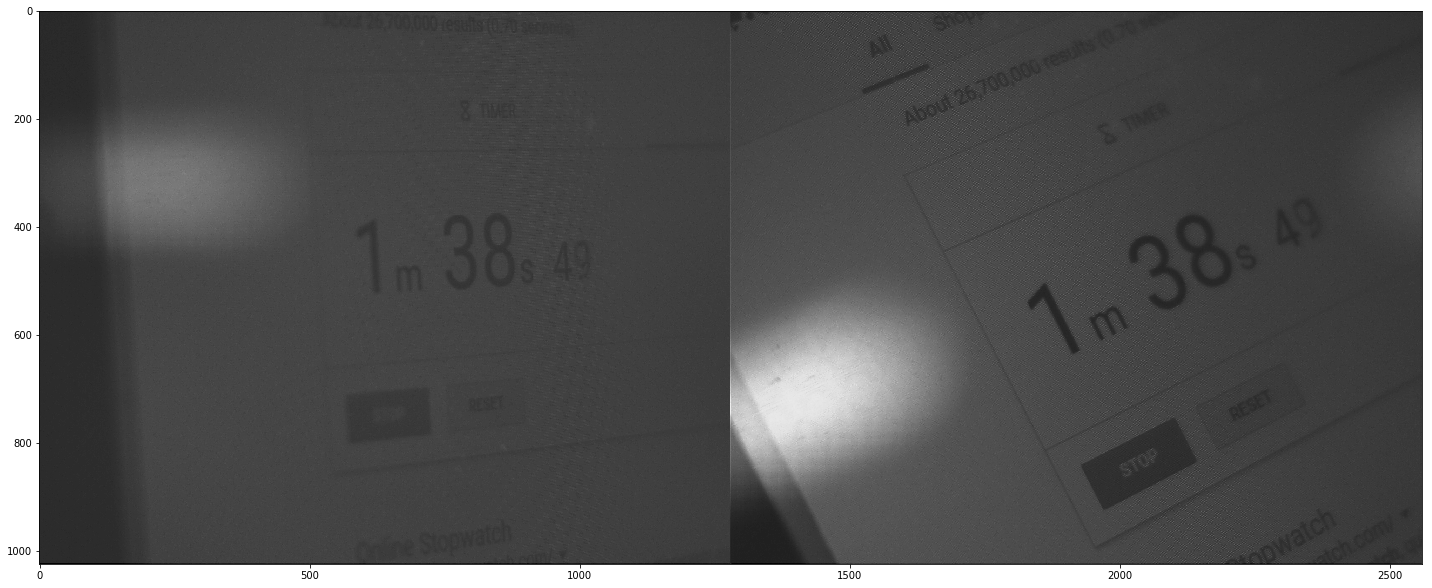

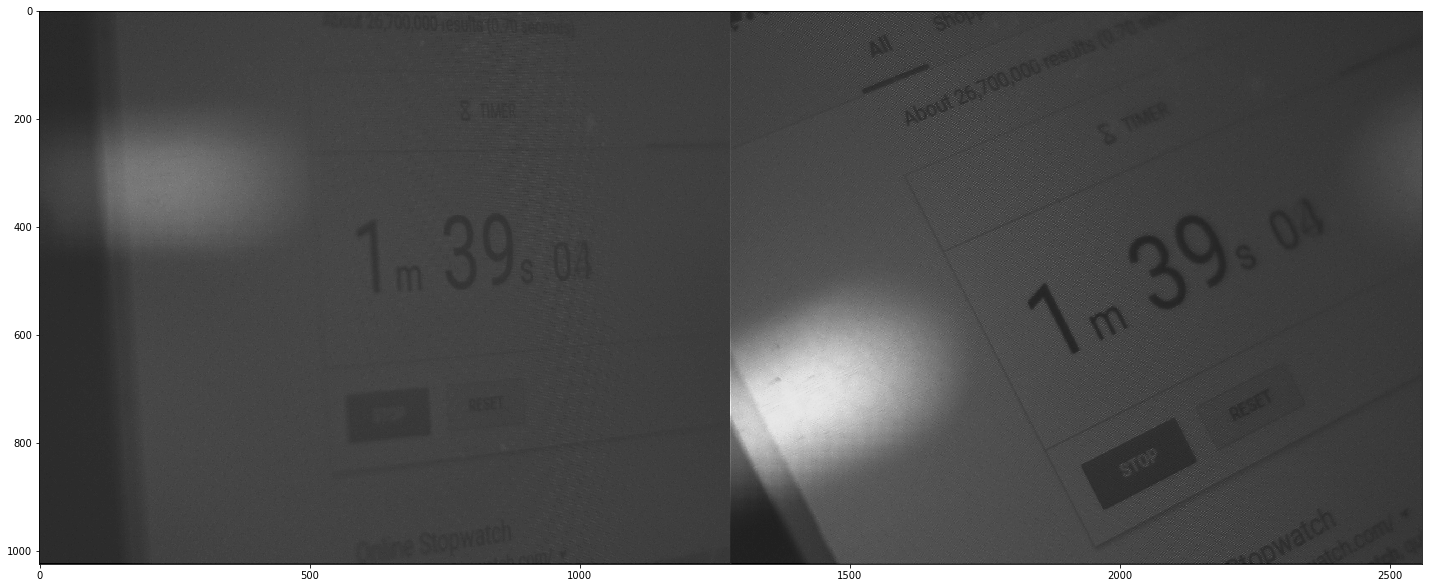

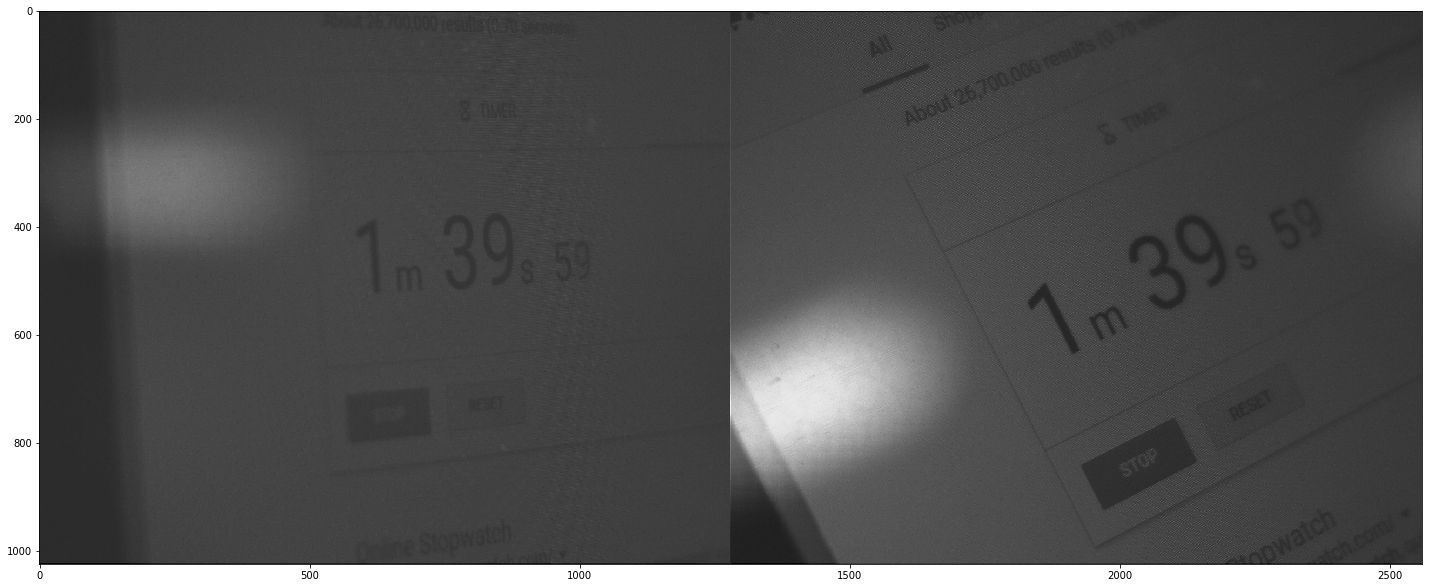

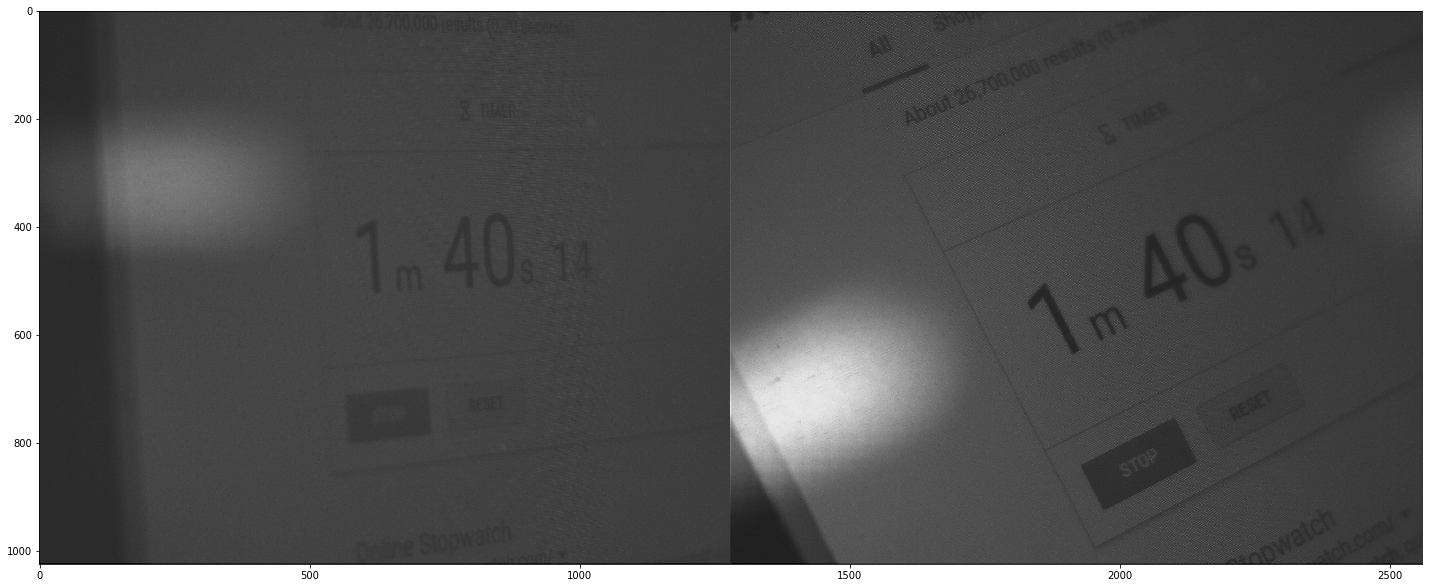

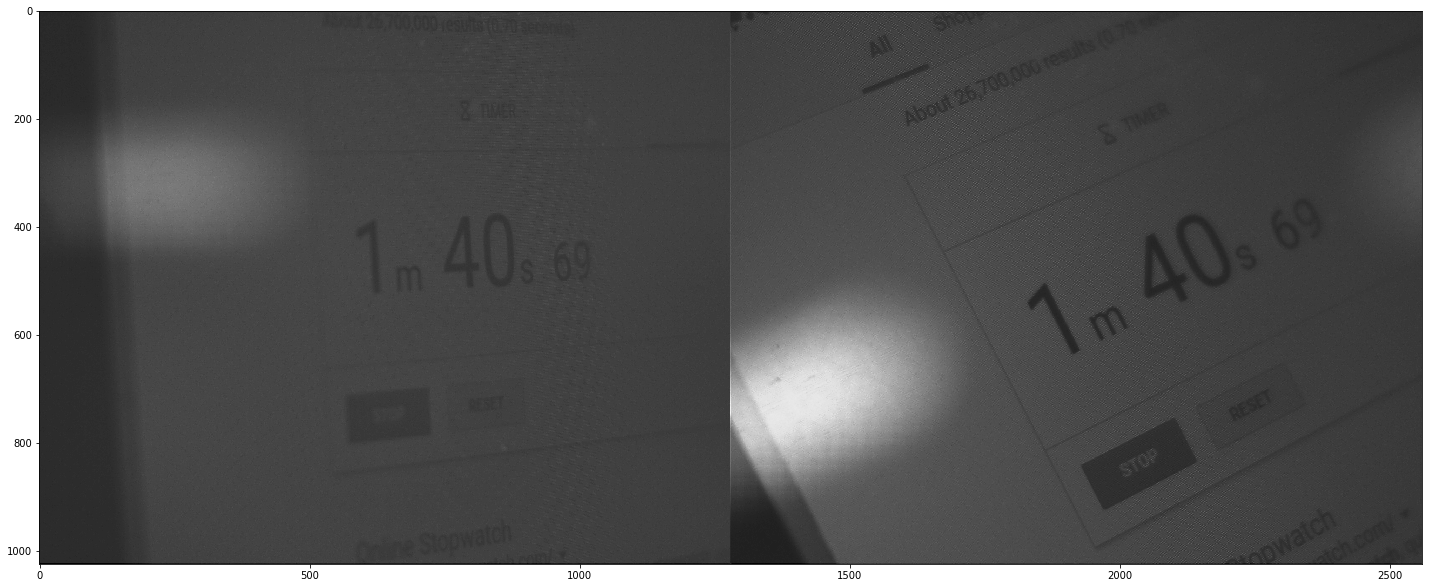

In [51]:
for ii in range(10):
    imgg = np.concatenate((io.imread(c1[ii]), io.imread(c2[ii])), axis = 1)
    plt.figure(figsize=(20,10))
    io.imshow(imgg)